In [1]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

In [2]:
# Load Gene INFO
HGNC = pd.read_csv("/Users/jiayao/Work/Resources/protein-coding_gene.txt", delimiter="\t")
ENSID2Entrez = dict(zip(HGNC["ensembl_gene_id"].values, HGNC["entrez_id"].values))
GeneSymbol2Entrez = dict(zip(HGNC["symbol"].values, HGNC["entrez_id"].values))
Entrez2Symbol = dict(zip(HGNC["entrez_id"].values, HGNC["symbol"].values))
allen_mouse_genes = loadgenelist("../dat/allen-mouse-exp/allen-mouse-gene_entrez.txt")

# Load Exp Zscore Matrix
ExpMat = "../dat/allen-mouse-exp/energy-conn-model.csv"
ExpMat = pd.read_csv(ExpMat, index_col="ROW")

ExpZscoreMat = "../dat/allen-mouse-exp/energy-zscore-conn-model.csv"
ExpZscoreMat = pd.read_csv(ExpZscoreMat, index_col="ROW")

ExpMatNorm = "../dat/allen-mouse-exp/energy-neuronorm.csv"
ExpMatNorm = pd.read_csv(ExpMatNorm, index_col="ROW")

ExpZscoreMatNorm = "../dat/allen-mouse-exp/energy-zscore-neuronorm.csv"
ExpZscoreMatNorm = pd.read_csv(ExpZscoreMatNorm, index_col="ROW")

allen_mouse_genes = loadgenelist("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-exp/allen-mouse-gene_entrez.txt")

/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (38,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
def GetSTRBiasDist(STR, ExpMat, Genes2Weights, Match_DF):
    g_exp_level_zs = {}
    for i, (gene, weight) in enumerate(Genes2Weights.items()):
        try:
            g_exp_level = ExpMat.loc[gene, STR]
            assert g_exp_level == g_exp_level
        except:
            continue
        g_matches = Match_DF.loc[gene, :].values
        g_matches_exps = ExpMat.loc[g_matches, STR].values
        g_matches_exps = [x for x in g_matches_exps if x==x]
        g_exp_level_z = (g_exp_level - np.mean(g_matches_exps))/np.std(g_matches_exps)
        g_exp_level_score = g_exp_level_z * weight
        g_exp_level_zs[gene] = g_exp_level_score
    return g_exp_level_zs

def SingleGeneExpZ(STR, gene, ExpMat, Match_DF):
        g_exp_level = ExpMat.loc[gene, STR]
        assert g_exp_level == g_exp_level
        g_matches = Match_DF.loc[gene, :].values
        g_matches_exps = ExpMat.loc[g_matches, STR].values
        g_matches_exps = [x for x in g_matches_exps if x==x]
        PlotPermutationP(g_matches_exps, g_exp_level, title=STR)

In [3]:
gnomad_cons = pd.read_csv("/Users/jiayao/Work/Resources/gnomad.v2.1.1.lof_metrics.by_gene.txt",
                          delimiter="\t", index_col="gene")

In [54]:
### ASC 102 GENEs
#asc_mutable = pd.read_excel("../dat/genes/1-s2.0-S0092867419313984-mmc2.xlsx", sheet_name="Autosomal")
asc_mutable = pd.read_csv("../dat/genes/asc_tada_RR.csv")
asc102 = asc_mutable[asc_mutable["qval_dnccPTV"]<0.1]
asc_gene2None =   {} #0
asc_gene2RR = {}   #1
asc_gene2PostRR = {}
asc_gene2MutN = {} #2
asc_gene2LofZ = {} #3

asc_gene2RR_LGD = {}
asc_gene2MutN_LGD = {}

for i, row in asc102.iterrows():
    g = int(row["entrez_id"])
    #asc_gene2RR[g] = [1]
    asc_gene2PostRR[g] = [1]
    asc_gene2MutN[g] = 0
    if row["dn.ptv"] > 0 or row["case.ptv"] > 0:
        #asc_gene2RR[row["entrez_id"]].append(row["gamma_dn.ptv"])
        #asc_gene2RR[g].append(row["LGD_RR"])
        #LGD_RR = row["LGD_RR"]
        asc_gene2MutN[g] += 5*row["dn.ptv"]
    if row["dn.misa"] > 0:
        #asc_gene2RR[row["entrez_id"]].append(row["gamma_dn.misa"])
        #asc_gene2RR[g].append(row["misa_RR"])
        asc_gene2MutN[g] += 1*row["dn.misa"]
    if row["dn.misb"] > 0:
        #asc_gene2RR[row["entrez_id"]].append(row["gamma_dn.misb"])
        #asc_gene2RR[g].append(row["misb_RR"])
        asc_gene2MutN[g] += 2*row["dn.misb"]
    #if len(asc_gene2RR[g]) == 0:
    #    print(row["entrez_id"])
    
    asc_gene2RR_LGD[g] = row["LGD_RR"]
    asc_gene2MutN_LGD[g] = row["dn.ptv"]
    
    #asc_gene2RR[g] = max(asc_gene2RR[g])
    #asc_gene2RR[g] = math.log2(row["LGD_RR"] * 5 + row["misa_RR"] * 1 + row["misb_RR"] * 2)
    asc_gene2RR[g] = row["LGD_RR"] * 1 + row["misa_RR"] * 1 + row["misb_RR"] * 1
    asc_gene2None[g] = 1
    asc_gene2LofZ[g] = max(1, gnomad_cons.loc[row["gene"], "lof_z"]+1)
    
asd_asc_match_df = pd.read_csv("dat/matching/asd_asc_exp_matches_1000.csv", index_col="GENE")

In [64]:
asc_gene2RR[11011] = 100

In [65]:
Mediodorsal_MutN = GetSTRBiasDist("Mediodorsal_nucleus_of_thalamus", ExpMat, asc_gene2MutN, asd_asc_match_df)
Mediodorsal_RR = GetSTRBiasDist("Mediodorsal_nucleus_of_thalamus", ExpMat, asc_gene2RR, asd_asc_match_df)

In [66]:
def zscore(a, xx):
    return (a-np.mean(xx)) / np.std(xx)

11011 118.01687437723949 6.639935557399758
6934 72.10566864909816 4.015615584695281
11011 621.1414440907341 6.866092449811461
6934 289.0837915425353 3.1903084610850283


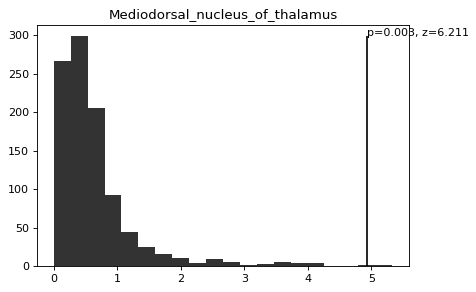

In [67]:
for k,v in Mediodorsal_MutN.items():
    if v > 60:
        print(k,v, zscore(v, list(Mediodorsal_MutN.values())))    
        
for k,v in Mediodorsal_RR.items():
    if v > 200:
        print(k,v, zscore(v, list(Mediodorsal_RR.values())))
        
SingleGeneExpZ("Mediodorsal_nucleus_of_thalamus", 11011, ExpMat, asd_asc_match_df)

11011 118.01687437723949 6.639935557399758
6934 72.10566864909816 4.015615584695281
11011 326.4063155560019 4.509663419357024
6934 289.0837915425353 3.9973471723163163


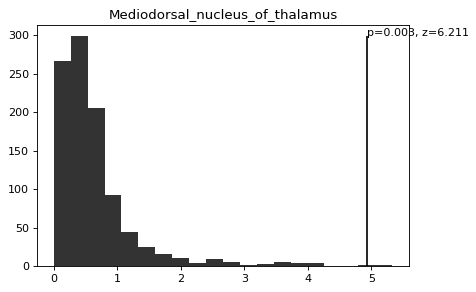

In [41]:
for k,v in Mediodorsal_MutN.items():
    if v > 60:
        print(k,v, zscore(v, list(Mediodorsal_MutN.values())))    
        
for k,v in Mediodorsal_RR.items():
    if v > 200:
        print(k,v, zscore(v, list(Mediodorsal_RR.values())))
        
SingleGeneExpZ("Mediodorsal_nucleus_of_thalamus", 11011, ExpMat, asd_asc_match_df)

1.8544206489990518


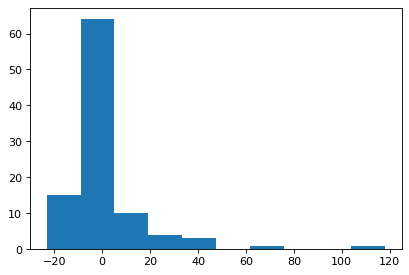

0.8823243884234504


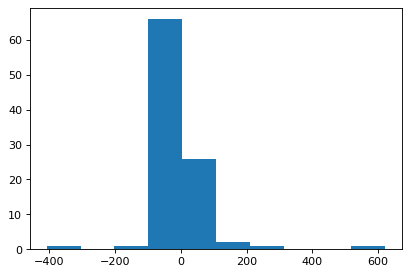

In [68]:
plt.hist(Mediodorsal_MutN.values())
print(np.mean(list(Mediodorsal_MutN.values())))
plt.show()
plt.hist(Mediodorsal_RR.values())
print(np.mean(list(Mediodorsal_RR.values())))
plt.show()

1.840724551926765


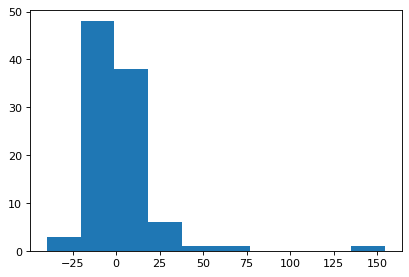

-0.04059337993818944


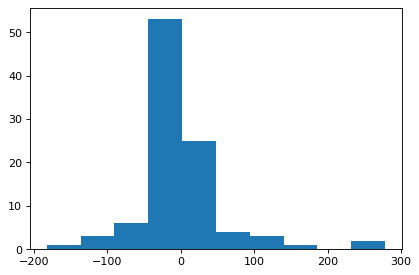

In [27]:
Nucleus_of_reuniens_MutN = GetSTRBiasDist("Nucleus_of_reuniens", ExpMat, asc_gene2MutN, asd_asc_match_df)
Nucleus_of_reuniens_RR = GetSTRBiasDist("Nucleus_of_reuniens", ExpMat, asc_gene2RR, asd_asc_match_df)

plt.hist(Nucleus_of_reuniens_MutN.values())
print(np.mean(list(Nucleus_of_reuniens_MutN.values())))
plt.show()
plt.hist(Nucleus_of_reuniens_RR.values())
print(np.mean(list(Nucleus_of_reuniens_RR.values())))
plt.show()

6326 154.58979460012694
6326 278.07557241171844
6934 259.60933885863443


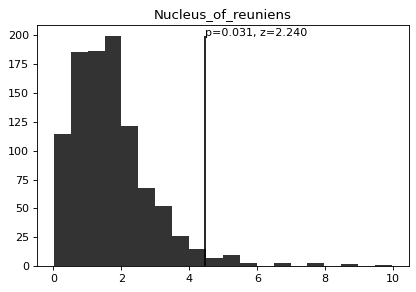

In [36]:
for k,v in Nucleus_of_reuniens_MutN.items():
    if v > 100:
        print(k,v)
        
for k,v in Nucleus_of_reuniens_RR.items():
    if v > 200:
        print(k,v)
        
SingleGeneExpZ("Nucleus_of_reuniens", 6326, ExpMat, asd_asc_match_df)

4.149826984927822


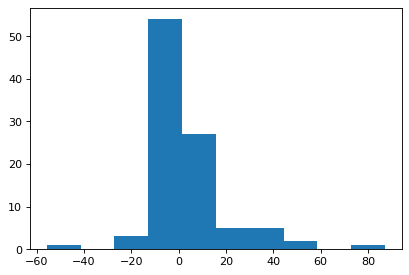

22.13476346619201


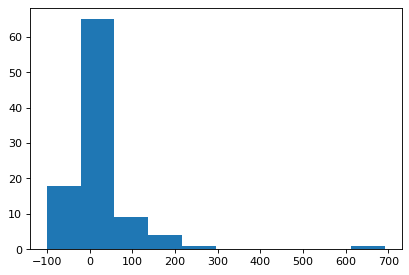

In [37]:
Dentate_gyrus_MutN = GetSTRBiasDist("Dentate_gyrus", ExpMat, asc_gene2MutN, asd_asc_match_df)
Dentate_gyrus_RR = GetSTRBiasDist("Dentate_gyrus", ExpMat, asc_gene2RR, asd_asc_match_df)

plt.hist(Dentate_gyrus_MutN.values())
print(np.mean(list(Dentate_gyrus_MutN.values())))
plt.show()
plt.hist(Dentate_gyrus_RR.values())
print(np.mean(list(Dentate_gyrus_RR.values())))
plt.show()